In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap

First we will divide the data into distinct class groupings based on the different treatments.

In [2]:
df = pd.read_csv('Data_Cortex_Nuclear.csv')

In [91]:
df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

In [4]:
y_str = df['class']

In [5]:
y_divided = pd.Categorical(y_str).codes

In [6]:
y_divided

array([0, 0, 0, ..., 7, 7, 7], dtype=int8)

In [7]:
y_ct = []
for clas in y_str:
    if 'c' in clas:
        y_ct.append(0)
    else:
        y_ct.append(1)
x = df.drop(columns = ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'])
x.fillna(0, inplace=True)

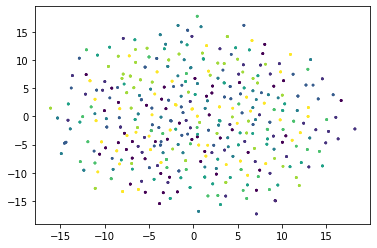

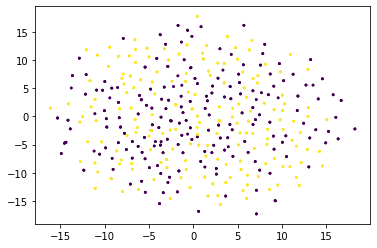

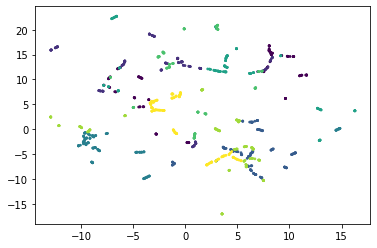

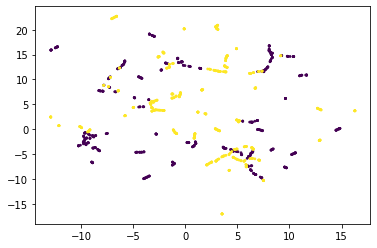

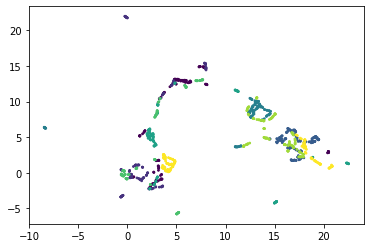

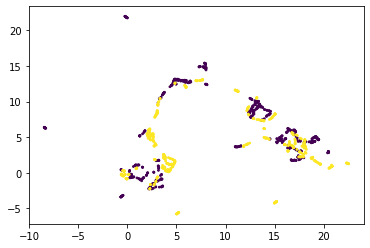

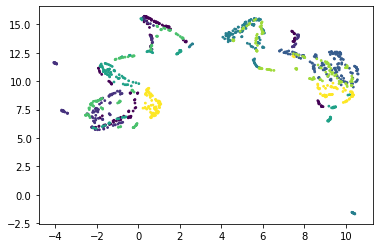

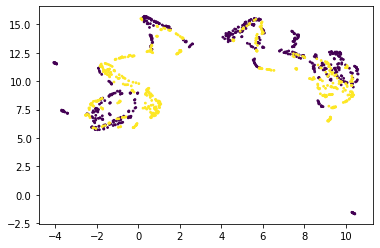

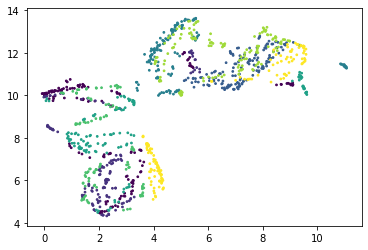

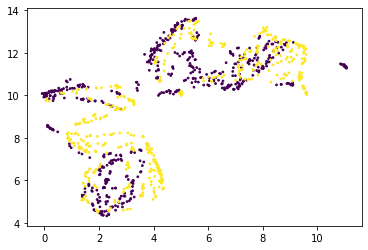

In [16]:
for n in [2,5,10,20,50]:
    mapper = umap.UMAP(n_neighbors=n).fit(x)
    plt.scatter(mapper.embedding_[:,0], mapper.embedding_[:,1], c=y_divided, s=3)
    plt.show()
    plt.scatter(mapper.embedding_[:,0], mapper.embedding_[:,1], c=y_ct, s=3)
    plt.show()

Unfortunately, it appears that we cannot simply divide the mouse cells into consistent groups using their most exact or most broad classification. Next we will attempt to use a Random Forest Classifier to determine the importance of each mouse protein in dividing them into groups to see which ones give us the best information.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
#For the full categories
x_train, x_test, y_train, y_test = train_test_split(x, y_divided)
clf = RandomForestClassifier().fit(x_train, y_train)

In [20]:
clf.score(x_test,y_test)

0.9962962962962963

Thus we see that the random forest was able to do a very accurate job distinguishing between the classes. Now we will look at what proteins distinguished them by looking at the information profile.

In [22]:
np.sum(clf.feature_importances_ > .001)

77

In [23]:
len(clf.feature_importances_)

77

Here is another issue with this dataset. Even though we were able to classify nearly everything correctly, we see here that every protein was important. This makes our lives a little more difficult. 

In [88]:
df.fillna(0, inplace=True)
classmean = []
for clas in y_str.unique():
    rslt_df = df[df['class'] == clas]
    classmean.append(np.mean(rslt_df, axis=1).values)

In [89]:
classmean

[array([0.75014947, 0.72490621, 0.72828884, 0.67631673, 0.66533768,
        0.66327657, 0.64170864, 0.62838619, 0.60585313, 0.59714901,
        0.59459945, 0.58506714, 0.57012293, 0.569303  , 0.55583758,
        0.74504237, 0.69689466, 0.69266208, 0.69452748, 0.61557812,
        0.64000189, 0.67232355, 0.64625852, 0.60247896, 0.6089681 ,
        0.66484288, 0.5824725 , 0.54305183, 0.54938152, 0.53383847,
        0.80122932, 0.82193556, 0.826215  , 0.75905301, 0.78341816,
        0.80215656, 0.71859788, 0.74123599, 0.76670992, 0.72938604,
        0.74429709, 0.75494649, 0.69886839, 0.71243786, 0.72341602,
        0.78998672, 0.79531998, 0.80838809, 0.76519857, 0.7747842 ,
        0.78819656, 0.71196026, 0.73480643, 0.75264919, 0.67490694,
        0.67767404, 0.67636187, 0.66618793, 0.66868104, 0.66455503,
        0.69002723, 0.71362084, 0.71862133, 0.6811486 , 0.68234249,
        0.69597547, 0.63728536, 0.64254499, 0.64396269, 0.61329244,
        0.61213203, 0.62499682, 0.60641196, 0.61

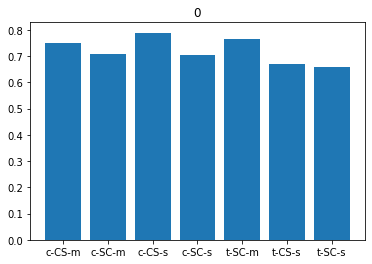

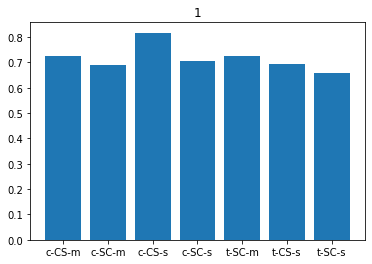

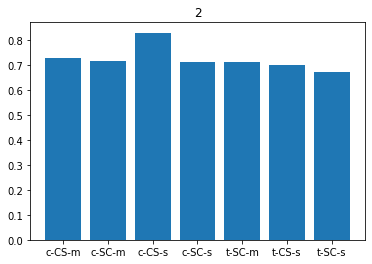

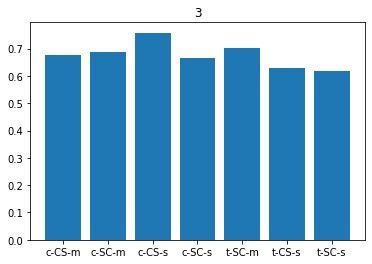

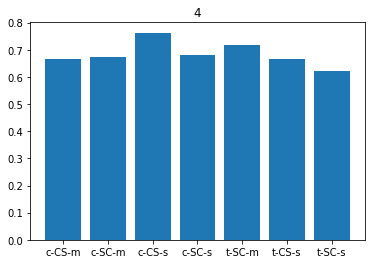

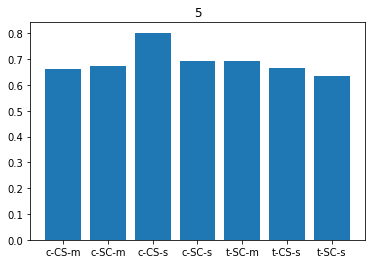

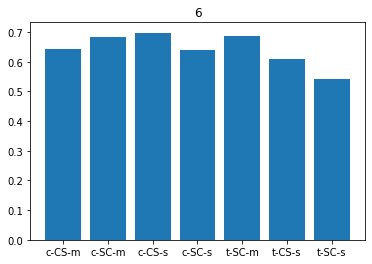

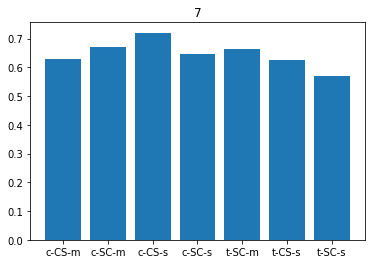

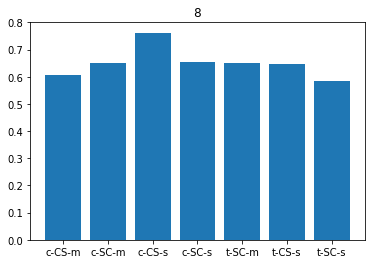

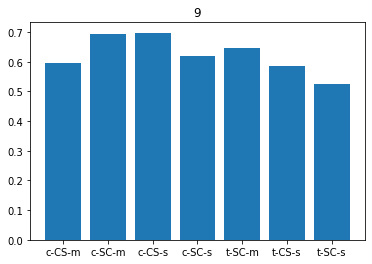

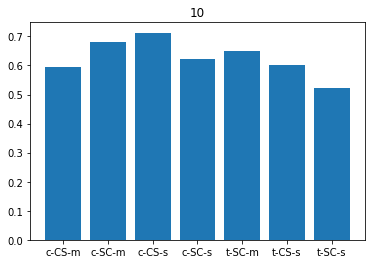

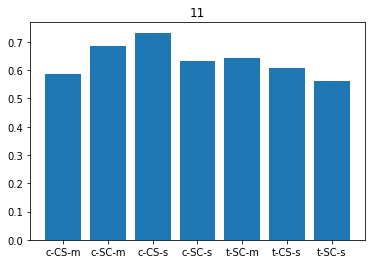

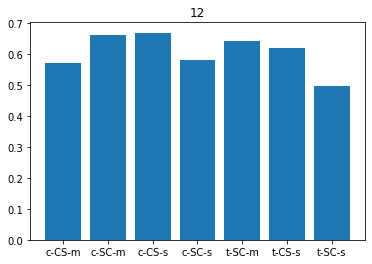

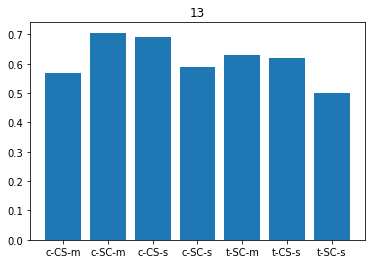

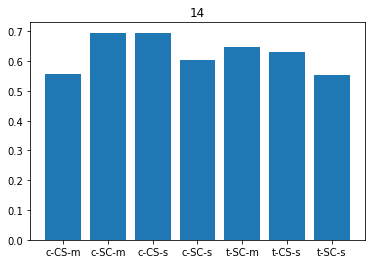

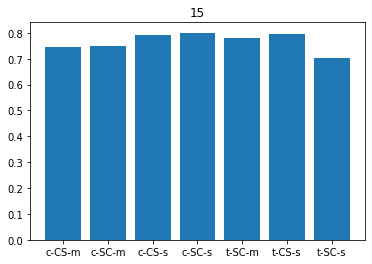

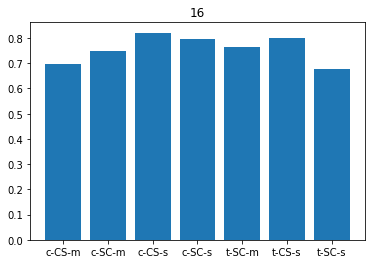

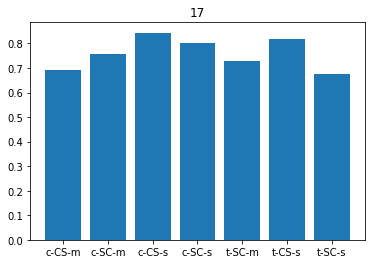

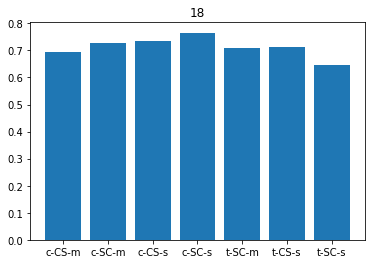

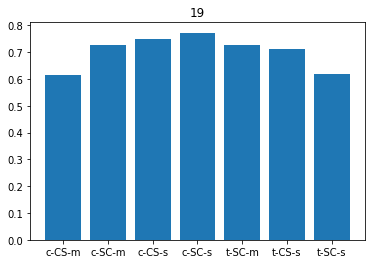

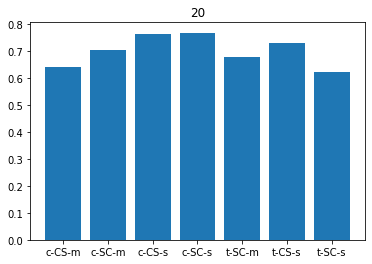

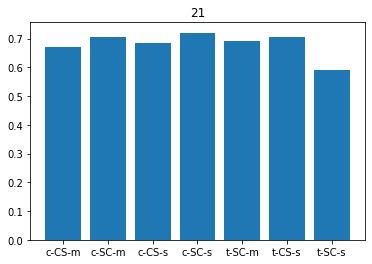

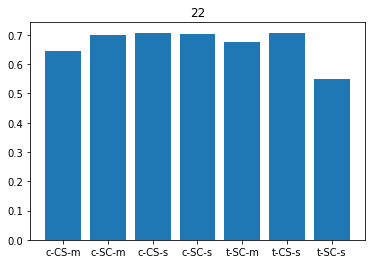

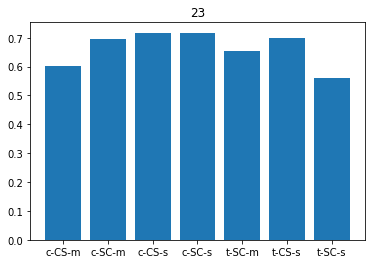

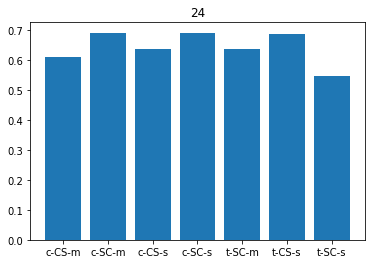

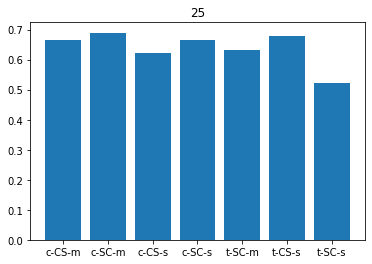

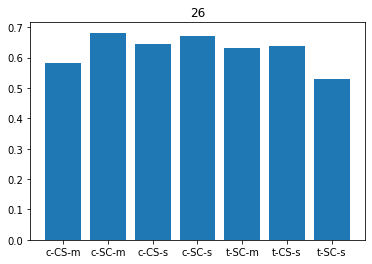

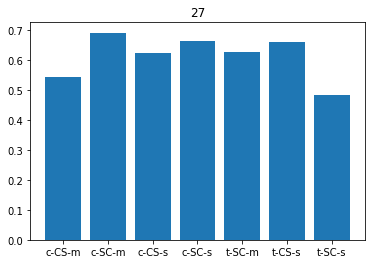

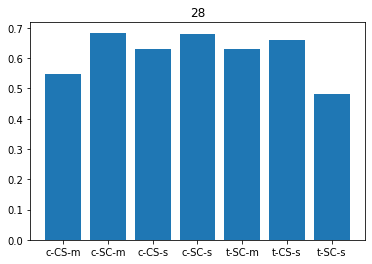

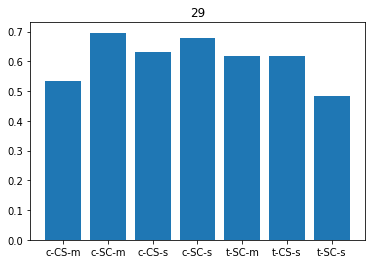

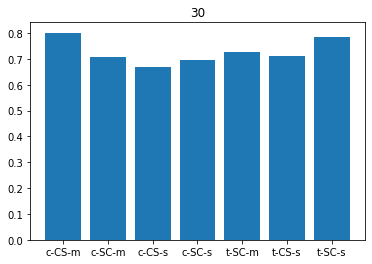

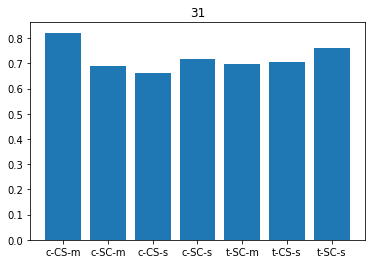

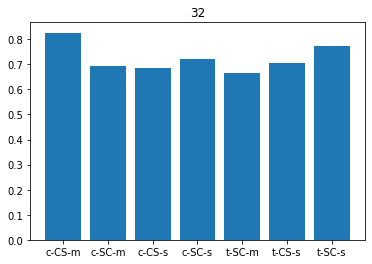

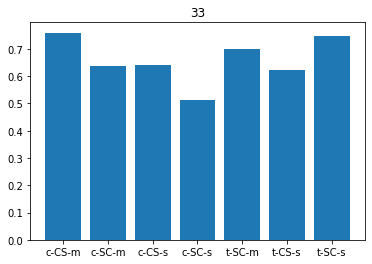

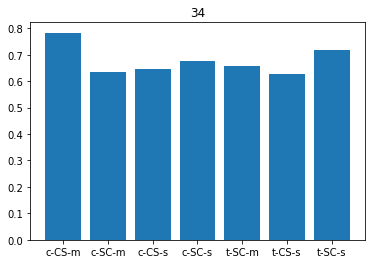

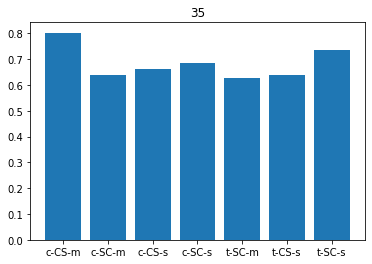

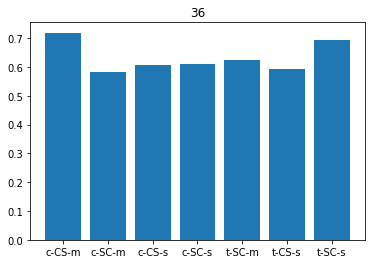

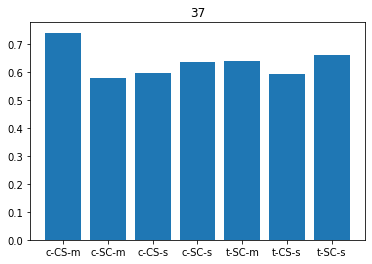

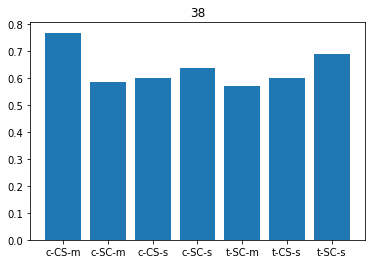

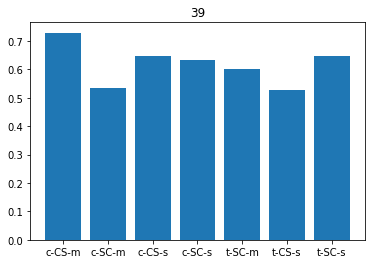

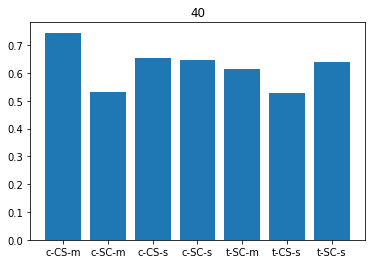

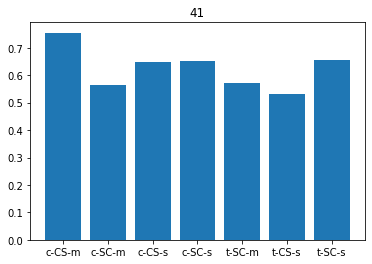

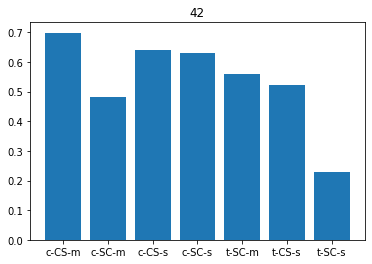

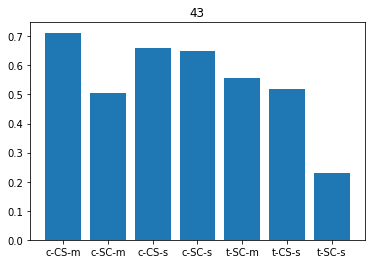

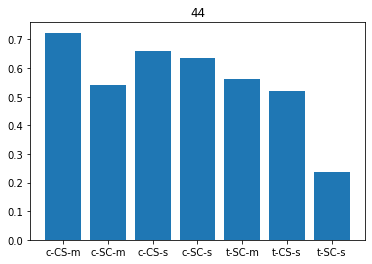

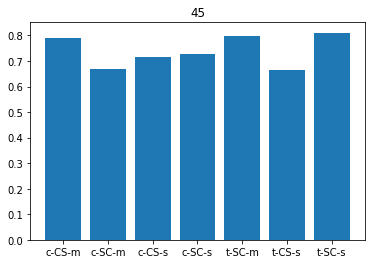

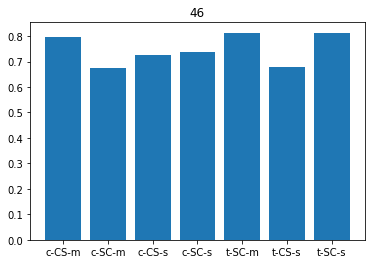

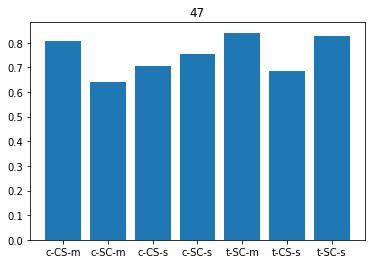

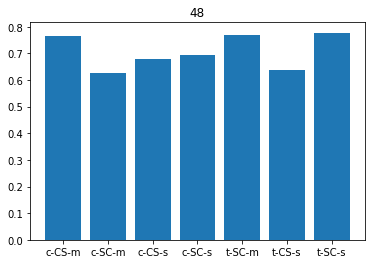

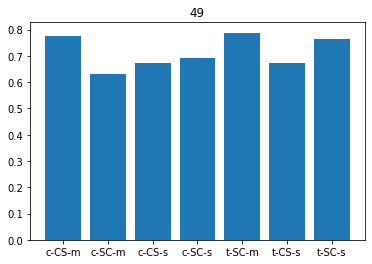

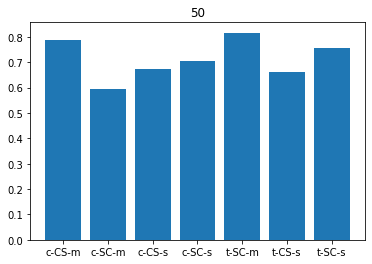

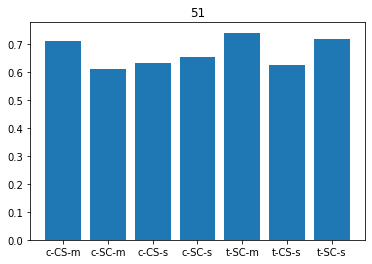

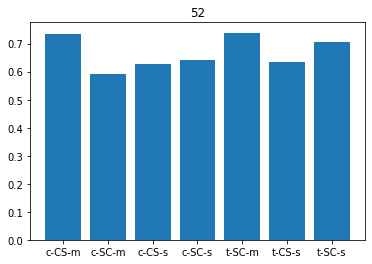

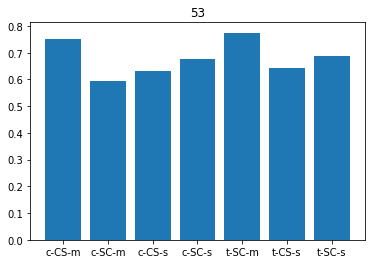

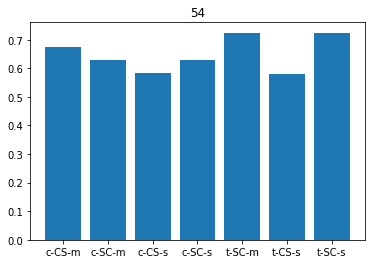

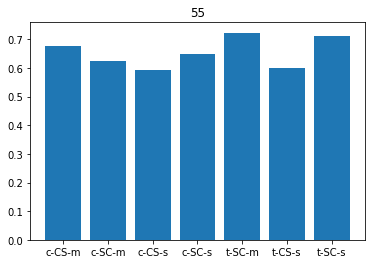

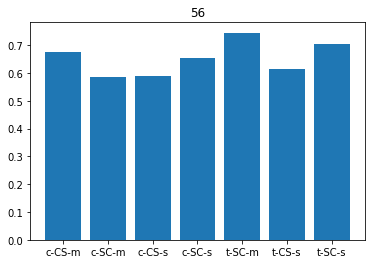

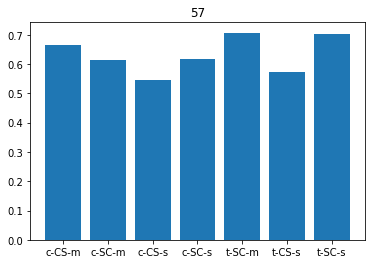

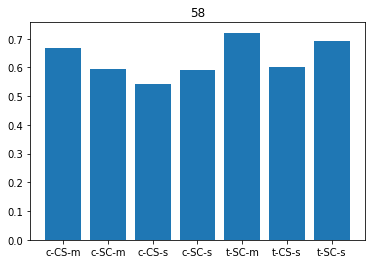

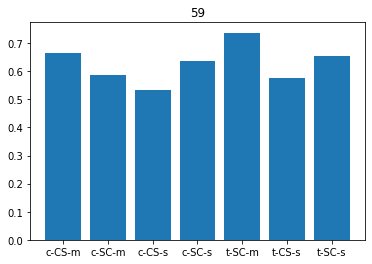

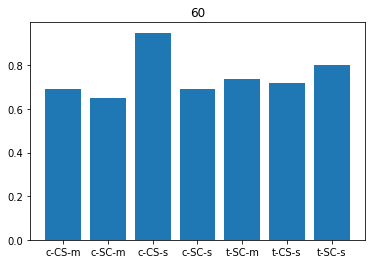

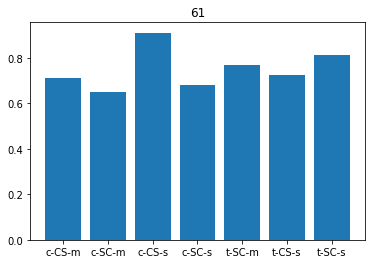

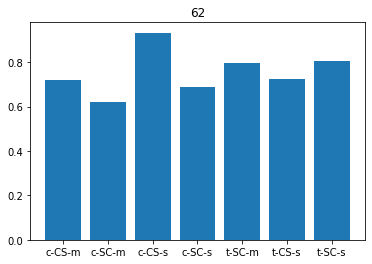

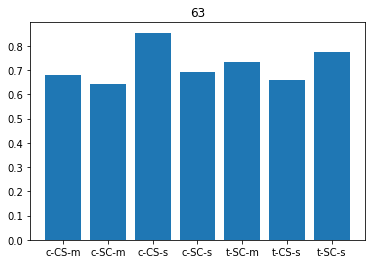

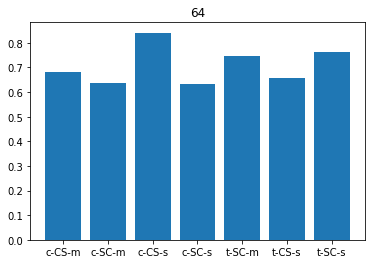

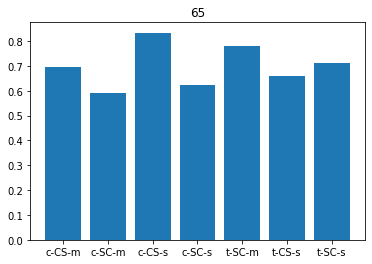

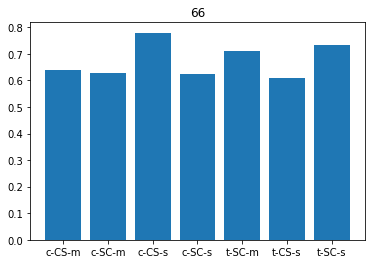

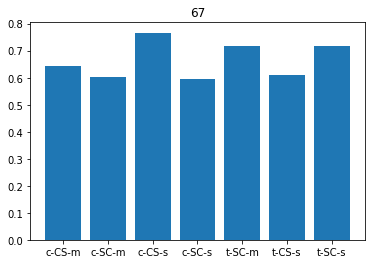

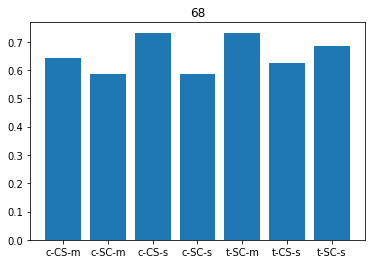

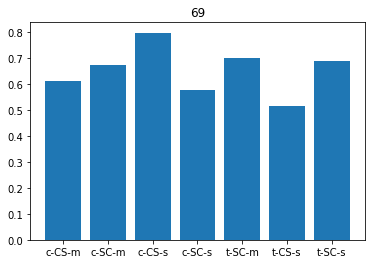

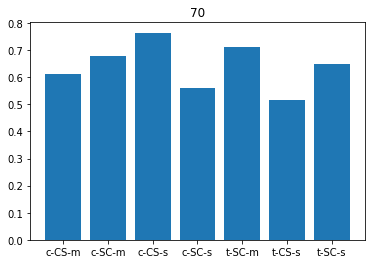

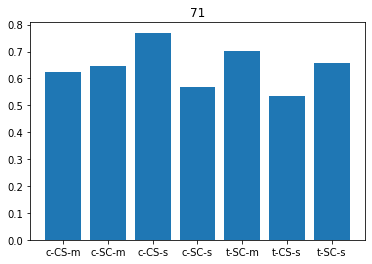

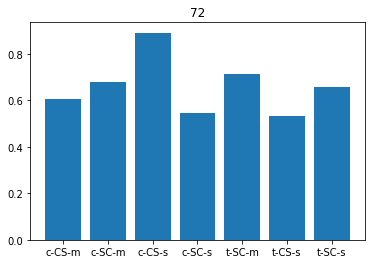

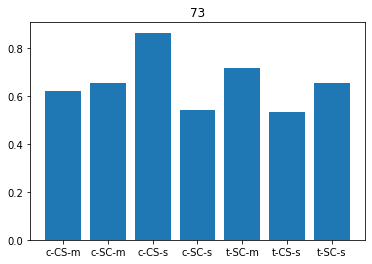

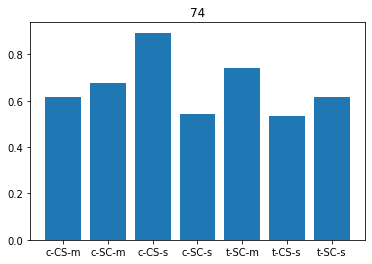

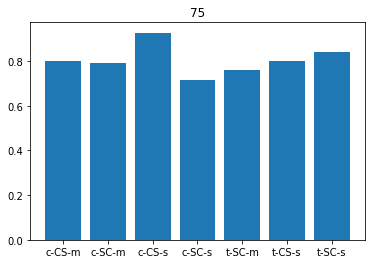

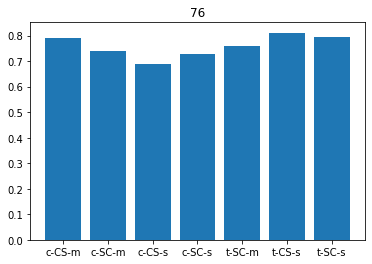

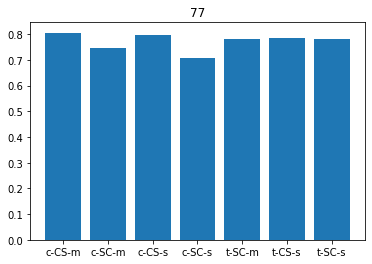

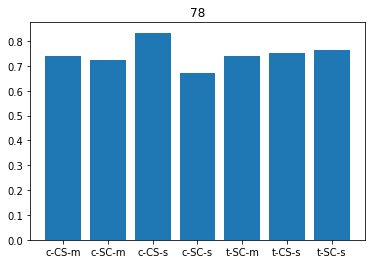

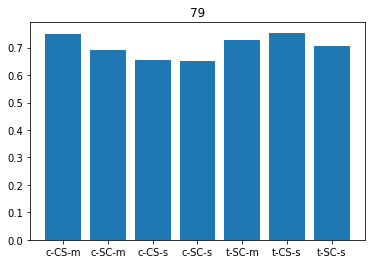

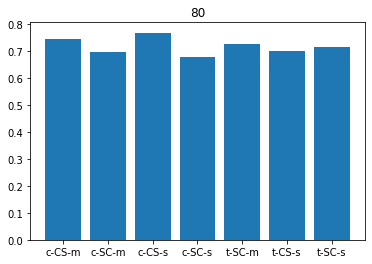

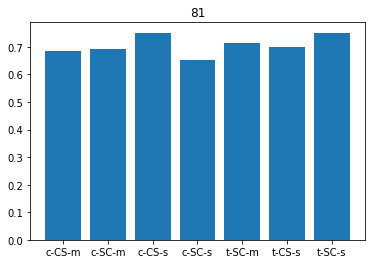

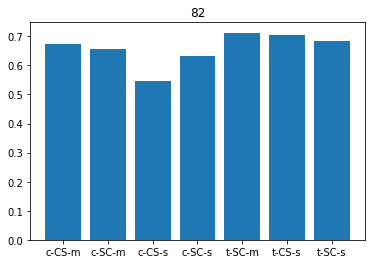

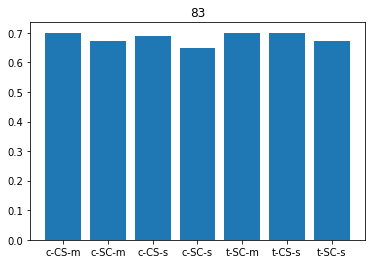

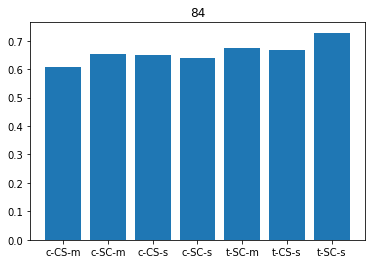

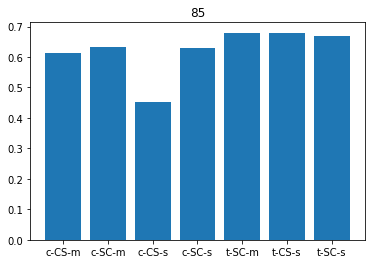

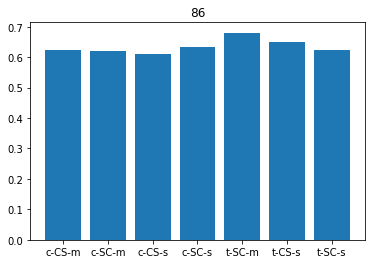

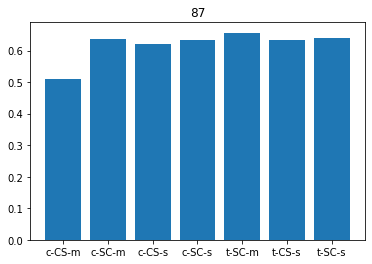

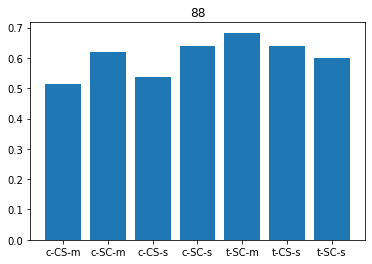

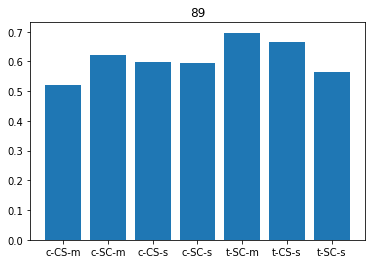

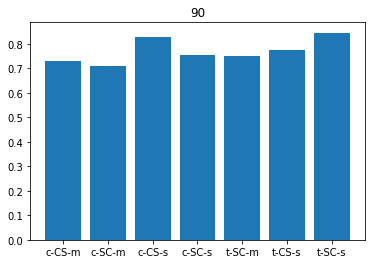

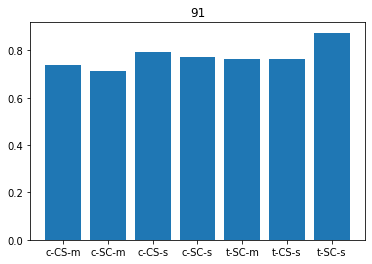

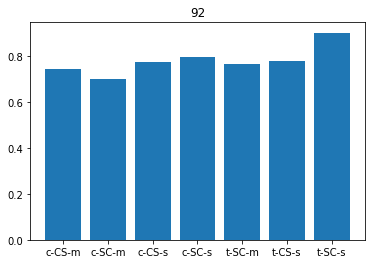

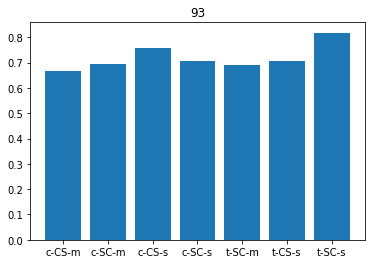

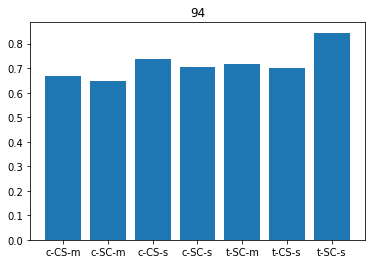

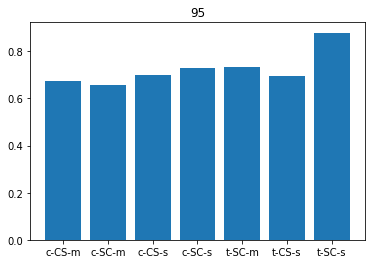

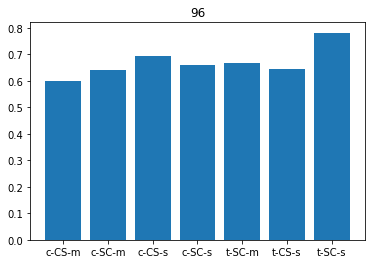

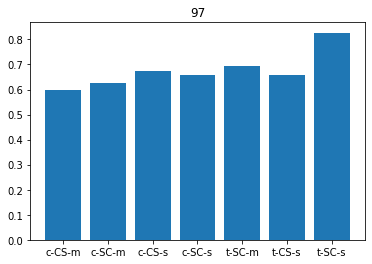

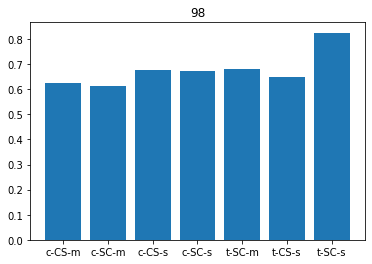

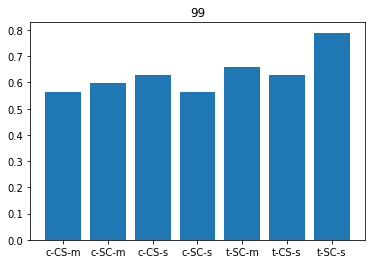

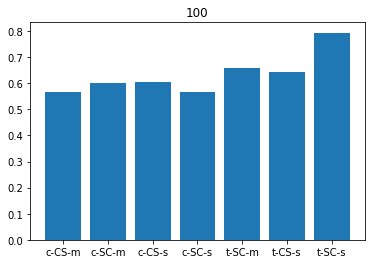

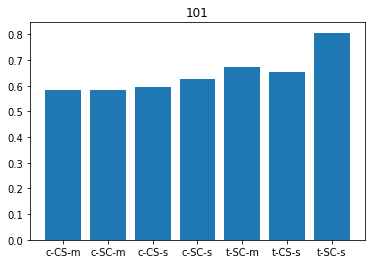

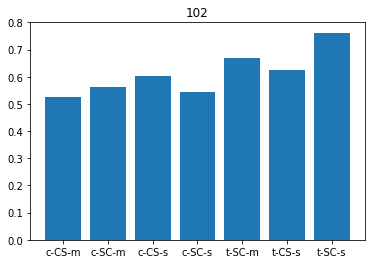

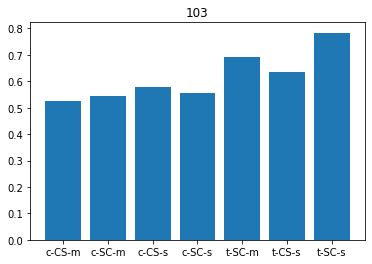

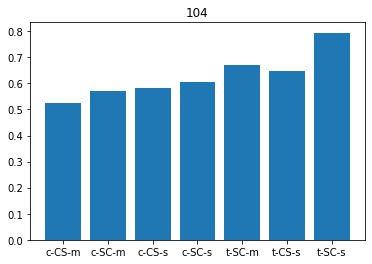

IndexError: index 105 is out of bounds for axis 0 with size 105

In [93]:
for j in range(0,150):
    #print('here')
    data = {'c-CS-m':classmean[0][j], 'c-SC-m':classmean[1][j], 'c-CS-s':classmean[2][j], 'c-SC-s':classmean[3][j], 't-SC-m':classmean[4][j], 't-SC-m':classmean[5][j], 't-CS-s':classmean[6][j], 't-SC-s':classmean[7][j]}
    #print('here')
    #print(list(data.keys()))
    #print(list(data.values()))
    plt.bar(list(data.keys()), list(data.values()))
    plt.title(j)
    plt.show()

In [62]:
y_str.unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [87]:
classmean[3]

[array([0.70253021, 0.70517038, 0.71201968, 0.66377342, 0.68144955,
        0.69252086, 0.64127208, 0.64537609, 0.65608566, 0.61824671,
        0.62193045, 0.63198237, 0.58098791, 0.58792204, 0.60392874,
        0.80051411, 0.79704349, 0.80139865, 0.76553452, 0.77303622,
        0.76873239, 0.72050143, 0.70407626, 0.71703505, 0.69000835,
        0.66617221, 0.67047167, 0.66341601, 0.68114612, 0.67876259,
        0.69589844, 0.71616519, 0.72061961, 0.51235205, 0.67703473,
        0.68319498, 0.6114515 , 0.63612287, 0.63439564, 0.6334258 ,
        0.64673116, 0.65272441, 0.63173015, 0.64953889, 0.63589629,
        0.72580425, 0.73609126, 0.75446976, 0.69240961, 0.69015451,
        0.70476188, 0.65257997, 0.64264233, 0.67495219, 0.62912273,
        0.64755153, 0.65366274, 0.61717241, 0.59224299, 0.63647833,
        0.68992194, 0.68175104, 0.68979139, 0.69143036, 0.63281628,
        0.62506722, 0.62359536, 0.59493008, 0.58505462, 0.57738872,
        0.55958457, 0.56925277, 0.54507594, 0.54

In [49]:
plt.bar([classmean[0][0], classmean[1][0], classmean[2][0], classmean[3][0], classmean[4][0], classmean[5][0], classmean[6][0], classmean[7][0]])

KeyError: 0